# Visualization of Learning

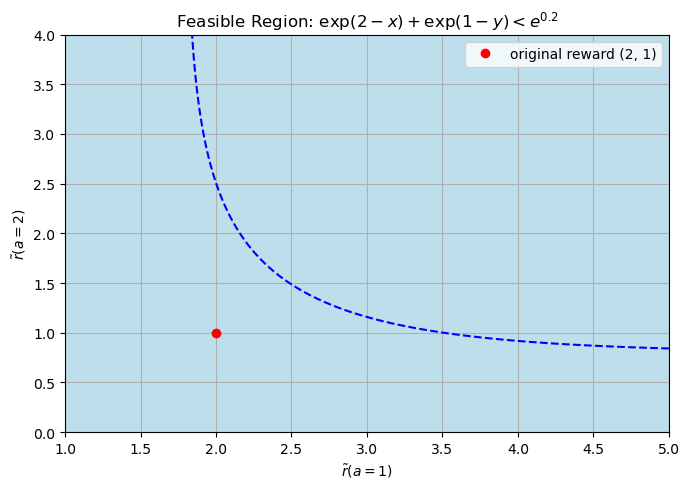

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set epsilon
epsilon = 0.2
rhs = np.exp(epsilon)

# Create grid
x_vals = np.linspace(1, 5, 400)
y_vals = np.linspace(0, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute inequality region
Z = np.exp(2 - X) + np.exp(1 - Y)
mask = Z < rhs

# Plot feasible region
plt.figure(figsize=(7, 5))
plt.contourf(X, Y, mask, levels=1, colors=["lightblue"], alpha=0.8)
plt.contour(X, Y, Z, levels=[rhs], colors='blue', linewidths=1.5, linestyles='--')
plt.plot(2, 1, 'ro', label='original reward (2, 1)')

plt.xlabel(r"$\tilde{r}(a=1)$")
plt.ylabel(r"$\tilde{r}(a=2)$")
plt.title(r"Feasible Region: $\exp(2 - x) + \exp(1 - y) < e^{0.2}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
# 对计算100000次均值为0的泊松分布计时
import time
time_now = time.time()
for _ in range(1000000):
    np.random.poisson(0)
print(time.time()-time_now)

time_now = time.time()
for _ in range(1000000):
    a = 0
print(time.time()-time_now)

# give me a random key
animals = ['cat', 'dog', 'fish', 'bird', 'elephant', 'lion', 'tiger', 'bear', 'panda', 'monkey']
animals_value = np.random.randint(0, 10, 10)
animals_dict = dict(zip(animals, animals_value))
for key, value in animals_dict.items():
    print(key, value)

0.4373443126678467
0.026643037796020508
cat 2
dog 3
fish 1
bird 6
elephant 7
lion 2
tiger 3
bear 2
panda 3
monkey 2


In [3]:
# high-dimensional reacher
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=2, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)
    
plt.figure(figsize=(8,6))
file_pre = './'
y=np.load(file_pre+'rewards_lstm.npy')
y_=np.load(file_pre+'rewards.npy')

x=np.arange(len(y))
episode_length = 150
x = episode_length*x
plt.plot(x, smooth(y), label = 'SAC_LSTM', color='b')
plt.plot(x, smooth(y_), label = 'SAC', color='r')

plt.xlabel('Samples')
plt.ylabel('Reward')
# plt.ylim(0)
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('reward_compare.pdf')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './rewards_lstm.npy'

<Figure size 800x600 with 0 Axes>

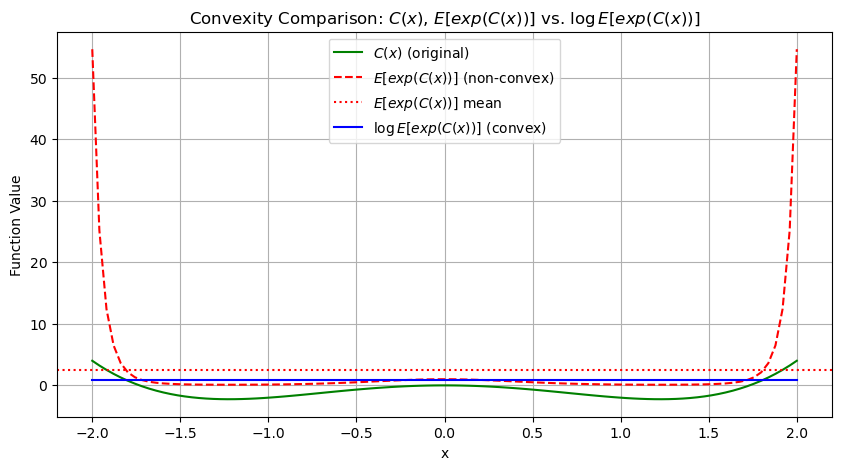

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

# Define C(x) as a non-convex function
def C(x):
    return x**4 - 3*x**2

# Generate x-axis values
x = np.linspace(-2, 2, 100)
C_x = C(x)

# Calculate E[exp(C(x))] (assuming uniform distribution)
E_exp_C = np.mean(np.exp(C_x))

# Calculate log(E[exp(C(x))])
log_E_exp_C = np.log(E_exp_C)

# Calculate E[exp(C(x))] at each x
E_exp_C_x = np.exp(C_x)

# Calculate log E[exp(C(x))] at different x (using logsumexp for approximation)
log_E_exp_C_x = logsumexp(C_x) - np.log(len(x))

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(x, C_x, label=r'$C(x)$ (original)', linestyle='solid', color='g')
plt.plot(x, E_exp_C_x, label=r'$E[exp(C(x))]$ (non-convex)', linestyle='dashed', color='r')
plt.axhline(y=E_exp_C, color='r', linestyle='dotted', label=r'$E[exp(C(x))]$ mean')
plt.plot(x, np.full_like(x, log_E_exp_C_x), label=r'$\log E[exp(C(x))]$ (convex)', linestyle='solid', color='b')

plt.xlabel("x")
plt.ylabel("Function Value")
plt.title("Convexity Comparison: $C(x)$, $E[exp(C(x))]$ vs. $\log E[exp(C(x))]$")
plt.legend()
plt.grid()
plt.show()


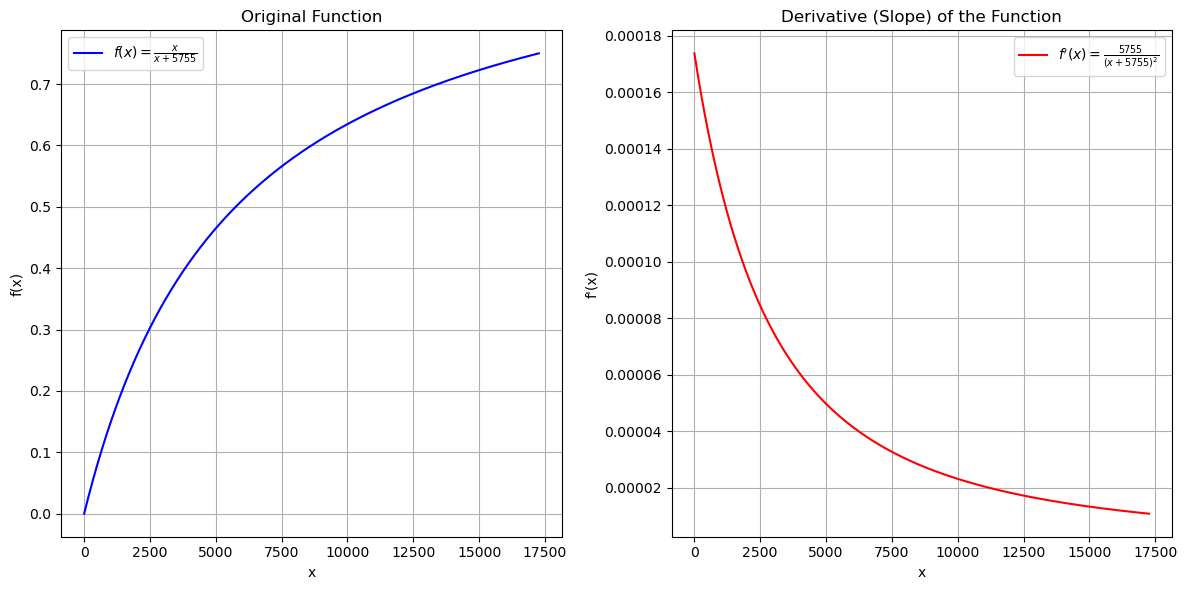

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义原函数
def f(x):
    return x / (x + 5755)

# 定义导数函数
def f_prime(x):
    return 5755 / (x + 5755)**2

# 生成x值
x_values = np.linspace(0, 17265, 17265)

# 计算原函数和导数值
y_values = f(x_values)
dy_values = f_prime(x_values)

# 绘制原函数和导数
plt.figure(figsize=(12, 6))

# 原函数
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label=r'$f(x) = \frac{x}{x + 5755}$', color='blue')
plt.title('Original Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# 导数
plt.subplot(1, 2, 2)
plt.plot(x_values, dy_values, label=r"$f'(x) = \frac{5755}{(x + 5755)^2}$", color='red')
plt.title('Derivative (Slope) of the Function')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

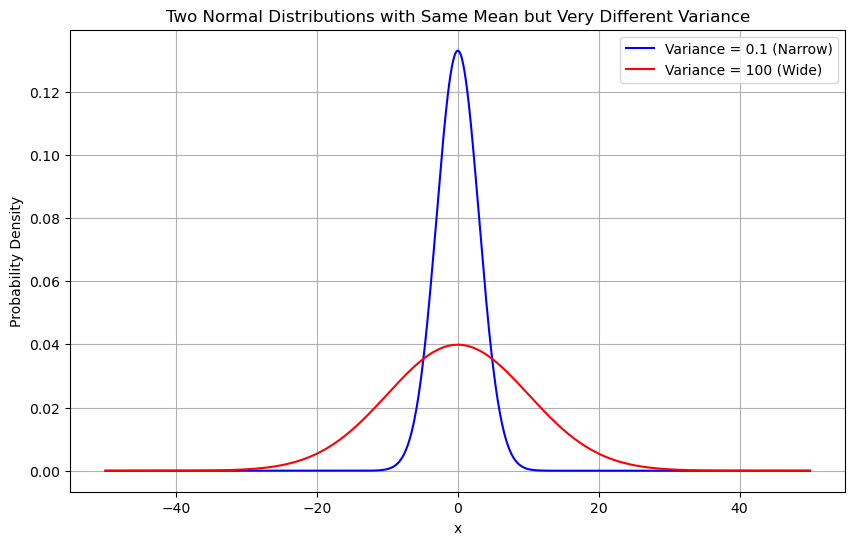

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子（可选，确保可复现）
np.random.seed(0)

# 参数设置
mean = 0
std_small = 3  # 方差 = 0.1，因此标准差是 sqrt(0.1)
std_large = 10     # 方差 = 100

# 生成数据
x = np.linspace(-50, 50, 1000)
y_small = (1 / (std_small * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_small)**2)
y_large = (1 / (std_large * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_large)**2)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x, y_small, label='Variance = 0.1 (Narrow)', color='blue')
plt.plot(x, y_large, label='Variance = 100 (Wide)', color='red')
plt.title('Two Normal Distributions with Same Mean but Very Different Variance')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


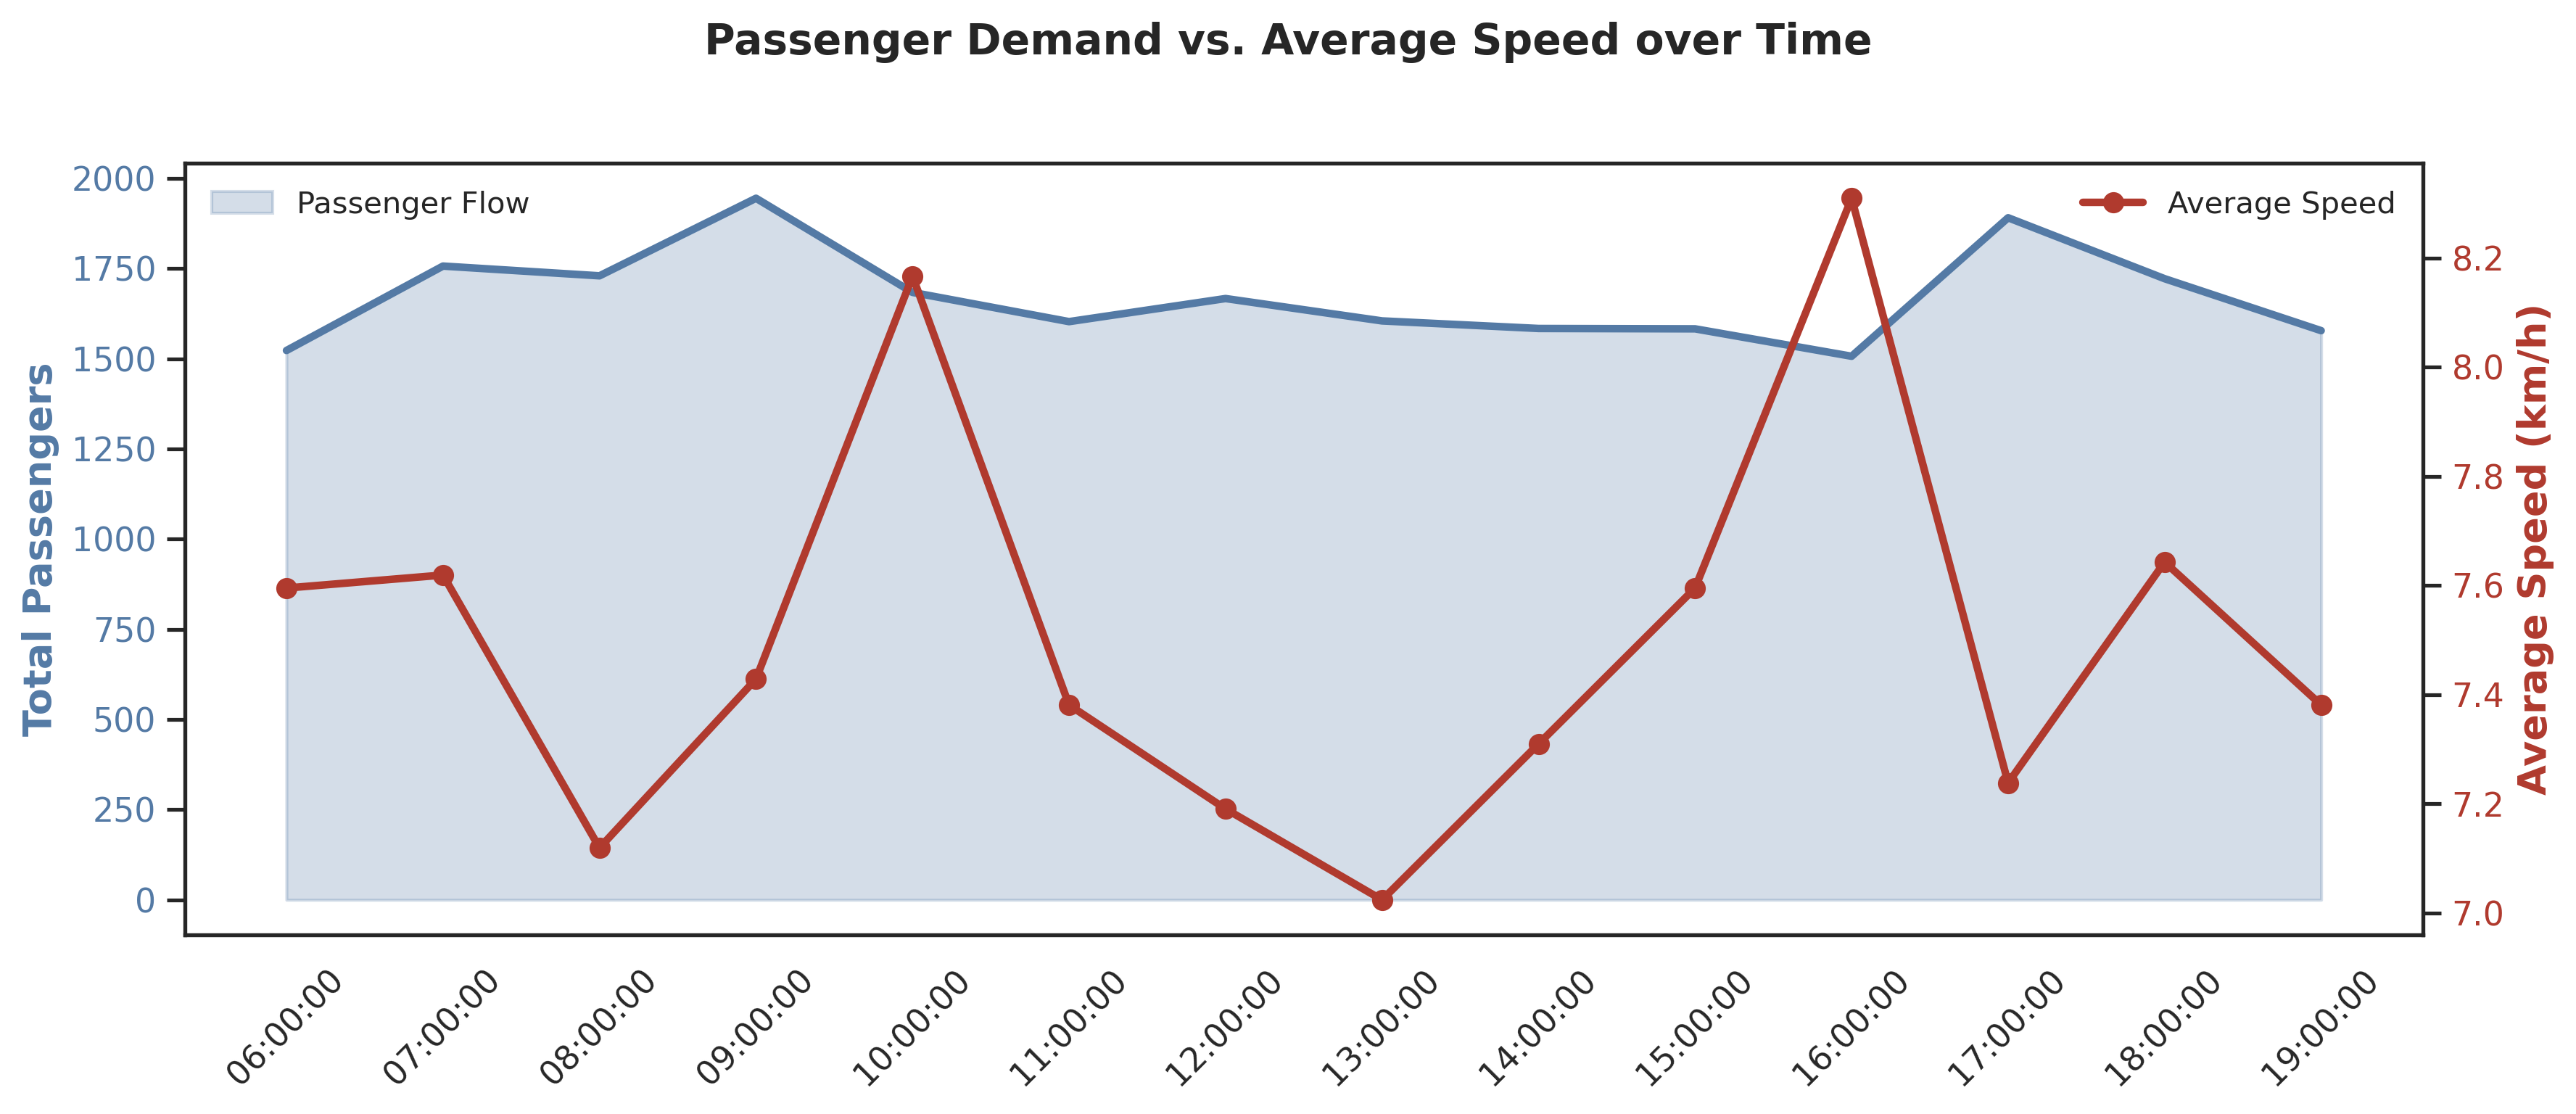

In [4]:
# Re-import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load real data
passenger_od_df = pd.read_excel("env/data/passenger_OD.xlsx")
route_news_df = pd.read_excel("env/data/route_news.xlsx")

# Preprocess passenger flow data
od_df = passenger_od_df.copy()
od_df.columns = ['time', 'origin'] + [f"X{i:02}" for i in range(1, od_df.shape[1]-2+1)]
od_df['total_passengers'] = od_df.iloc[:, 2:].sum(axis=1)
passenger_summary = od_df.groupby('time')['total_passengers'].sum()

# Preprocess route average speed data
time_columns = route_news_df.columns[5:]
route_condition_summary = route_news_df[time_columns].mean()

# Ensure index alignment
passenger_summary.index = passenger_summary.index.astype(str)
route_condition_summary.index = route_condition_summary.index.astype(str)

# Use common times
common_times = passenger_summary.index.intersection(route_condition_summary.index)
passenger_data = passenger_summary[common_times]
speed_data = route_condition_summary[common_times]
times = list(common_times)

# Prepare data
y1 = passenger_data.values
y2 = speed_data.values

# Plot
sns.set_style("white")  # Use clean white style instead of whitegrid
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=300)

# Left Y-axis: Passenger Flow
color1 = "#547AA5"
ax1.fill_between(times, y1, color=color1, alpha=0.25, label="Passenger Flow")
ax1.plot(times, y1, color=color1, linewidth=2.5)
ax1.set_ylabel("Total Passengers", fontsize=13, weight="bold", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)  # Turn off grid for ax1

# Right Y-axis: Average Speed
ax2 = ax1.twinx()
color2 = "#B03A2E"
ax2.plot(times, y2, color=color2, marker='o', linewidth=2.5, label="Average Speed")
ax2.set_ylabel("Average Speed (km/h)", fontsize=13, weight="bold", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)  # Turn off grid for ax2

# Titles and labels
# ax1.set_xlabel("Time of Day", fontsize=13, weight="bold")
fig.suptitle("Passenger Demand vs. Average Speed over Time", fontsize=14, weight="bold", y=1.02)
ax1.legend(loc='upper left', fontsize=10, frameon=False)
ax2.legend(loc='upper right', fontsize=10, frameon=False)

plt.tight_layout()
plt.show()


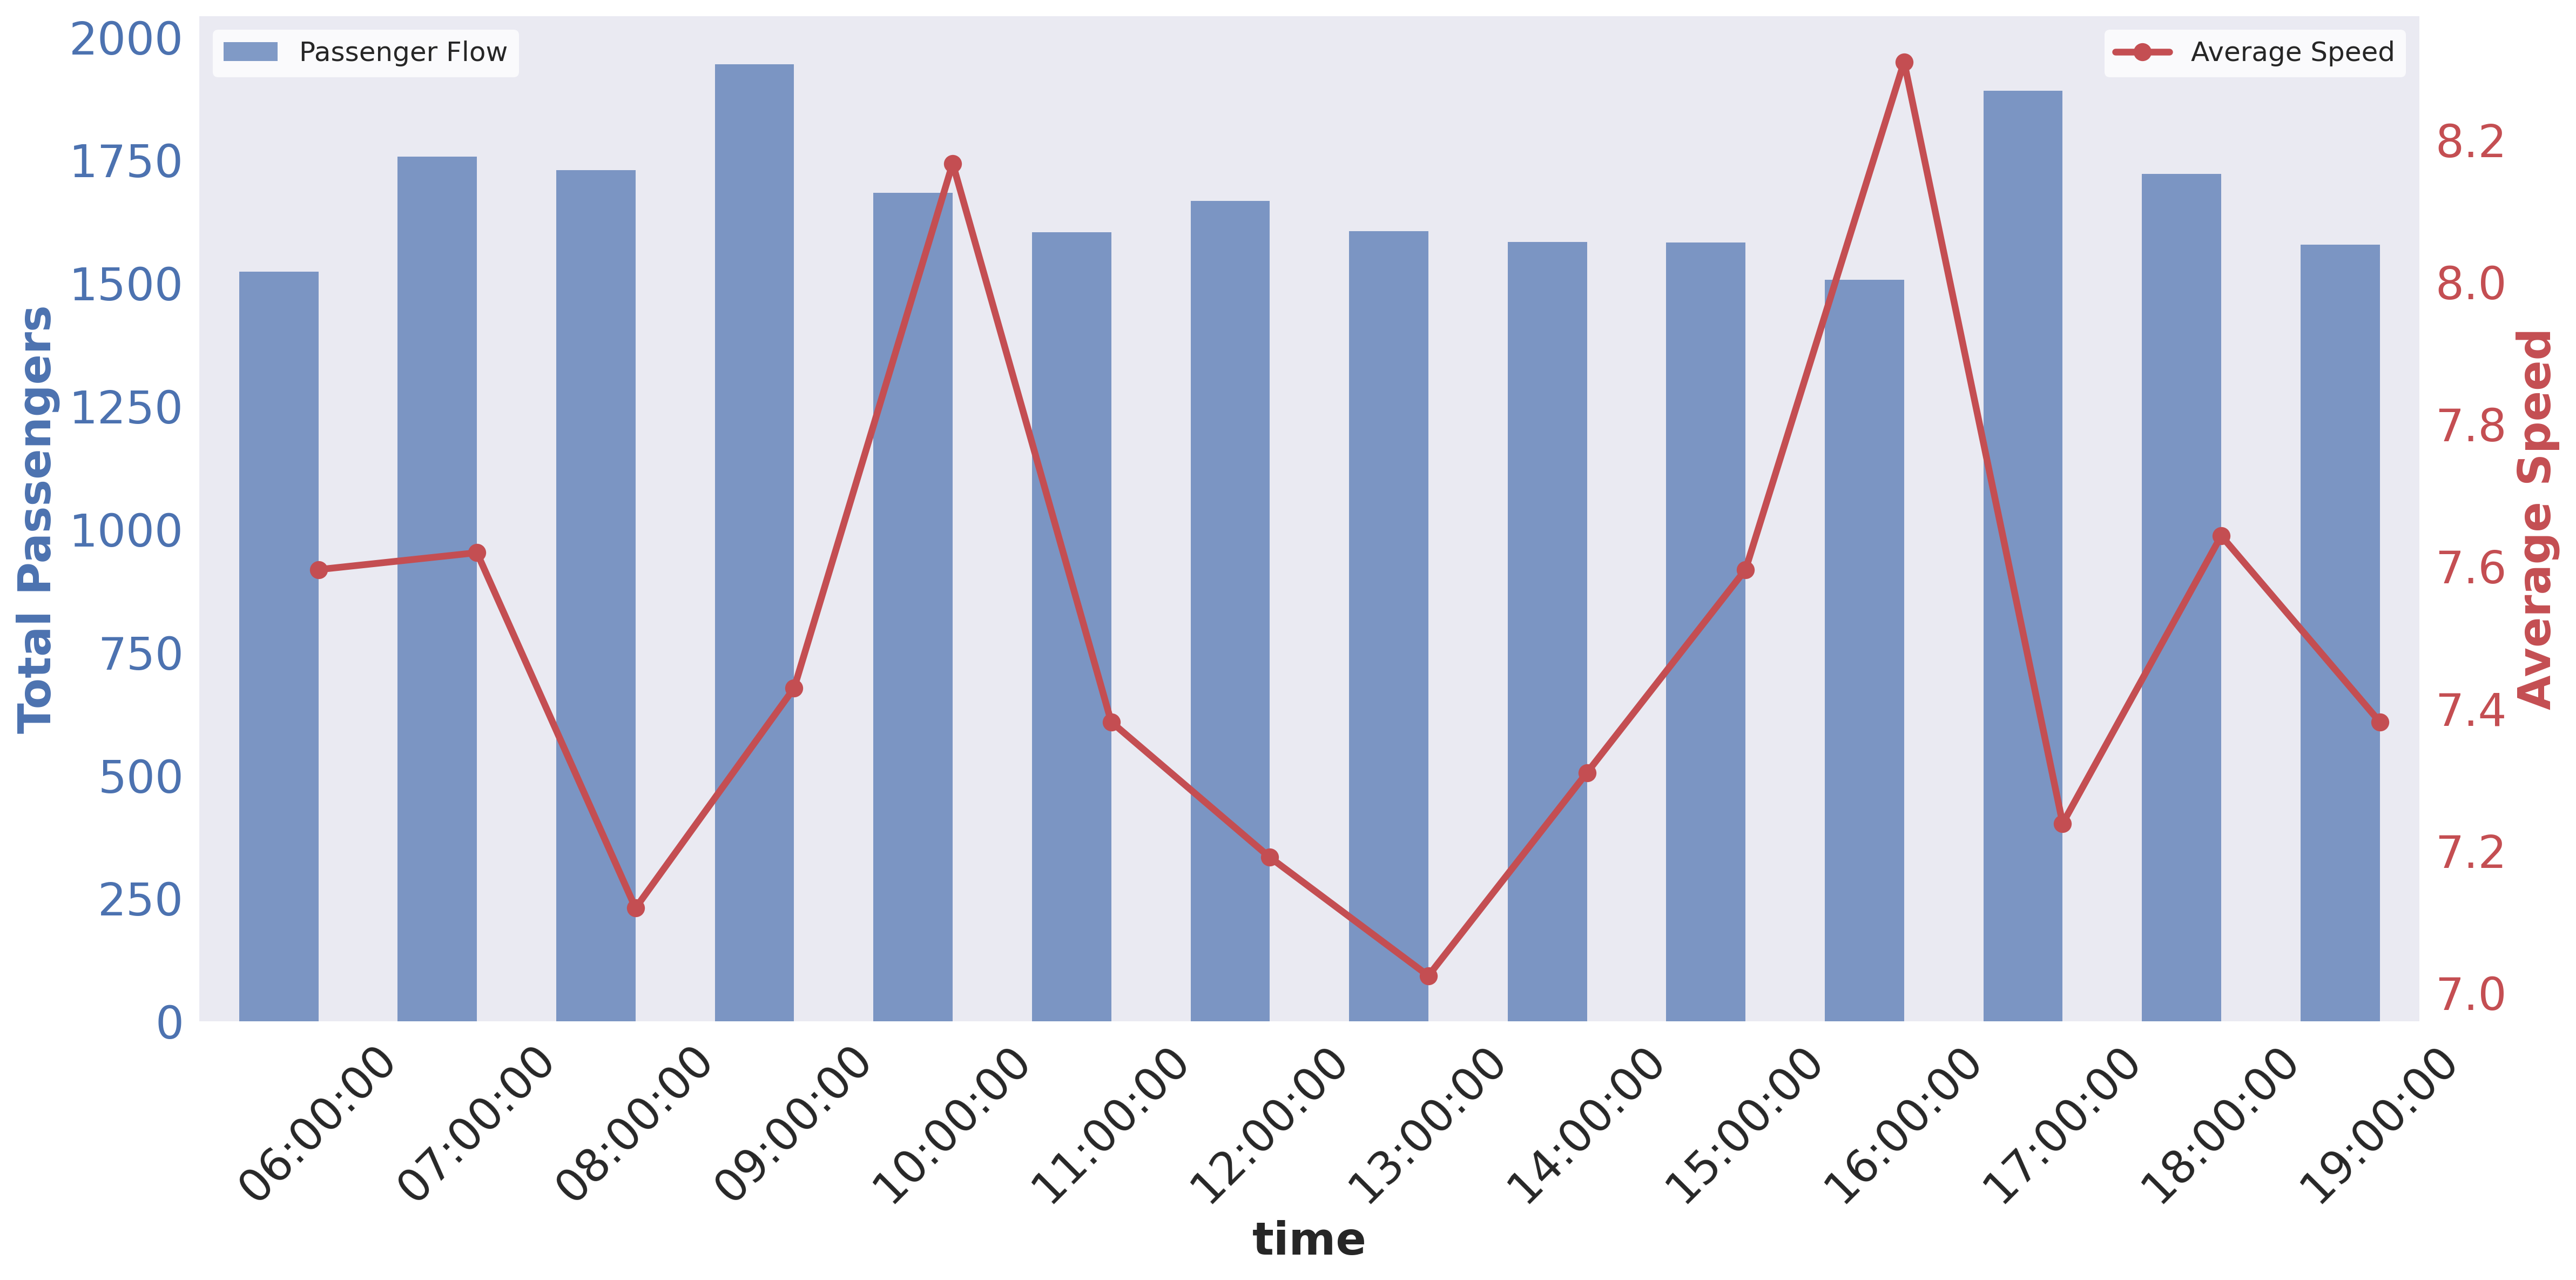

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel files to inspect the data
passenger_od_path = 'env/data/passenger_OD.xlsx'
route_news_path = 'env/data/route_news.xlsx'

# Load data
passenger_od_df = pd.read_excel(passenger_od_path)
route_news_df = pd.read_excel(route_news_path)

# Extract time column and relevant OD matrix
od_df = passenger_od_df.copy()
od_df.columns = ['time', 'origin'] + [f"X{i:02}" for i in range(1, od_df.shape[1]-2+1)]

# Calculate total passengers per time interval
od_df['total_passengers'] = od_df.iloc[:, 2:].sum(axis=1)
passenger_summary = od_df.groupby('time')['total_passengers'].sum()

# Identify time columns
time_columns = route_news_df.columns[5:]
route_condition_summary = route_news_df[time_columns].mean()

# 检查 index 类型并转换为字符串以确保一致性
passenger_summary.index = passenger_summary.index.astype(str)
route_condition_summary.index = route_condition_summary.index.astype(str)

# 创建更干净的图表
plt.style.use('seaborn-v0_8')  # 使用更干净的样式
fig, ax1 = plt.subplots(figsize=(16, 8), dpi=300)  # 保持大画布和高分辨率

# 客流量柱状图
color1 = '#4C72B0'  # 更柔和的蓝色
ax1.set_xlabel('Time', fontsize=20, fontweight='bold')
ax1.set_ylabel('Total Passengers', color=color1, fontsize=20, fontweight='bold')
passenger_summary.plot(kind='bar', ax=ax1, color=color1, alpha=0.7, width=0.5, position=1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=20)
ax1.tick_params(axis='x', labelsize=20, rotation=45)

# 关闭网格线
ax1.grid(False)
# 平均速度折线图
ax2 = ax1.twinx()
color2 = '#C44E52'  # 更柔和的红色
ax2.set_ylabel('Average Speed', color=color2, fontsize=20, fontweight='bold')
route_condition_summary.plot(ax=ax2, color=color2, marker='o', linewidth=3, markersize=8)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=20)
ax2.grid(False)
# 添加图例
ax1.legend(['Passenger Flow'], loc='upper left', fontsize=12, frameon=True, facecolor='white', edgecolor='none')
ax2.legend(['Average Speed'], loc='upper right', fontsize=12, frameon=True, facecolor='white', edgecolor='none')

fig.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# 假设你已经有 od_df、stations、times 和 Z

x_vals = np.tile(times, len(stations))
y_vals = np.repeat(stations, len(times))
z_vals = np.zeros_like(x_vals, dtype=float)
dz_vals = Z.flatten()

# 每个柱状图是由线段表示（起点 z=0，终点 z=dz）
bars = []
for x, y, z, dz in zip(x_vals, y_vals, z_vals, dz_vals):
    bars.append(go.Scatter3d(
        x=[x, x],
        y=[y, y],
        z=[z, dz],
        mode='lines',
        line=dict(color='royalblue', width=12),
        showlegend=False
    ))

layout = go.Layout(
    title='交互式三维柱状图：站点-时间-出发乘客数',
    scene=dict(
        xaxis=dict(title='时间', tickvals=list(times), ticktext=list(times)),
        yaxis=dict(title='站点', tickvals=list(stations), ticktext=list(stations)),
        zaxis=dict(title='出发乘客数')
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig = go.Figure(data=bars, layout=layout)
pio.show(fig)


In [ ]:
import numpy as np
np.std([-5,])  # Standard deviation of a list of numbers

2.5